病人ID        int64
年龄          int64
性别         object
地区         object
就诊日期       object
疾病类型       object
诊断日期       object
疾病严重程度     object
治疗方案       object
治疗结果       object
药物名称       object
药物分类       object
用药剂量       object
用药时长       object
检查项目       object
检查结果      float64
参考范围       object
体重        float64
身高        float64
吸烟情况       object
饮酒情况       object
遗传病史       object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   病人ID    5440 non-null   int64  
 1   年龄      5440 non-null   int64  
 2   性别      5440 non-null   object 
 3   地区      5438 non-null   object 
 4   就诊日期    5439 non-null   object 
 5   疾病类型    5440 non-null   object 
 6   诊断日期    5429 non-null   object 
 7   疾病严重程度  5439 non-null   object 
 8   治疗方案    5438 non-null   object 
 9   治疗结果    5437 non-null   object 
 10  药物名称    5438 non-null   object 
 1

/Users/shrcb-tj/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27835 (\N{CJK UNIFIED IDEOGRAPH-6CBB}) missing from font(s) Segoe UI.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shrcb-tj/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30103 (\N{CJK UNIFIED IDEOGRAPH-7597}) missing from font(s) Segoe UI.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shrcb-tj/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) Segoe UI.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shrcb-tj/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) Segoe UI.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shrcb-tj/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Gly

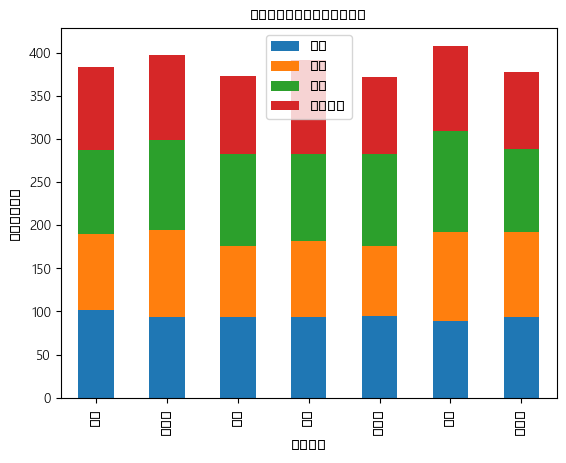

/var/folders/25/ddxgf1kn0r9_d2h2tgy2mv_m0000gn/T/ipykernel_67565/777741469.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(prop=my_font)  # 设置图例字体
/Users/shrcb-tj/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20005 (\N{CJK UNIFIED IDEOGRAPH-4E25}) missing from font(s) Segoe UI.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shrcb-tj/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) Segoe UI.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shrcb-tj/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) Segoe UI.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shrcb-tj/Library/Python/3.9/lib/pyt

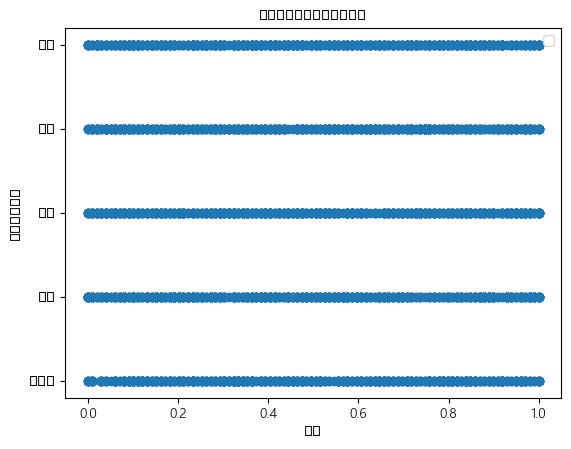

In [1]:
import pandas as pd

# 加载数据集并指定编码为gbk
data = pd.read_csv('medical_data.csv', encoding='gbk')

# 查看数据类型
print(data.dtypes)
# 查看表结构基本信息
print(data.info())

# 显示每一列的空缺值数量
print(data.isnull().sum())

# 规范日期格式
data['就诊日期'] = pd.to_datetime(data['就诊日期'])
data['诊断日期'] = pd.to_datetime(data['诊断日期'])

# 修改列名
data.rename(columns={'病人ID' : '患者ID'}, inplace=True)

# 查看修改后的表结构
print(data.head())

from datetime import datetime

# 增加诊断延迟和病程列
data['诊断延迟'] = (data['诊断日期'] -data['就诊日期']).dt.days
data['病程'] = (datetime(2024, 9, 1) - data['诊断日期']).dt.days

# 删除不合理的数据
data = data[(data['诊断延迟'] >= 0) & (data['年龄'] > 0) & (data['年龄'] < 120)]

# 查看修改后的数据
print(data.describe())

# 删除重复值并记录删除的行数
initial_rows = data.shape[0]
data.drop_duplicates(inplace=True)
deleted_rows = initial_rows - data.shape[0]

print(f'删除的重复行数: {deleted_rows}')

from sklearn.preprocessing import MinMaxScaler

# 对需要归一化的列进行处理
scaler = MinMaxScaler()
columns_to_normalize = ['年龄', '体重', '身高']
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# 查看归一化后的数据
print(data.head())

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# 统计治疗结果分布
treatment_outcome_distribution = data.groupby('疾病类型')['治疗结果'].value_counts().unstack()

# 设置中文字体
# font_path = 'C:/Windows/Fonts/simhei.ttf'  # 根据你的系统调整字体路径
font_path = '/Users/shrcb-tj/Library/Group Containers/UBF8T346G9.Office/FontCache/4/CloudFonts/Segoe UI/33236935743.ttf'  # 根据你的系统调整字体路径
my_font = fm.FontProperties(fname=font_path)

# 绘制柱状图
treatment_outcome_distribution.plot(kind='bar', stacked=True)
plt.title('不同疾病类型的治疗结果分布', fontproperties=my_font)
plt.xlabel('疾病类型', fontproperties=my_font)
plt.ylabel('治疗结果数量', fontproperties=my_font)
plt.xticks(fontproperties=my_font)  # 设置x轴刻度标签的字体
plt.yticks(fontproperties=my_font)  # 设置y轴刻度标签的字体
plt.legend(prop=my_font)  # 设置图例字体
plt.show()

# 绘制散点图
plt.scatter(data['年龄'], data['疾病严重程度'])
plt.title('年龄和疾病严重程度的关系', fontproperties=my_font)
plt.xlabel('年龄', fontproperties=my_font)
plt.ylabel('疾病严重程度', fontproperties=my_font)
plt.xticks(fontproperties=my_font)  # 设置x轴刻度标签的字体
plt.yticks(fontproperties=my_font)  # 设置y轴刻度标签的字体
plt.legend(prop=my_font)  # 设置图例字体
plt.show()

# 保存处理后得数据
output_path = '2.1.4_cleaned_data.csv'
data.to_csv(output_path, index=False)